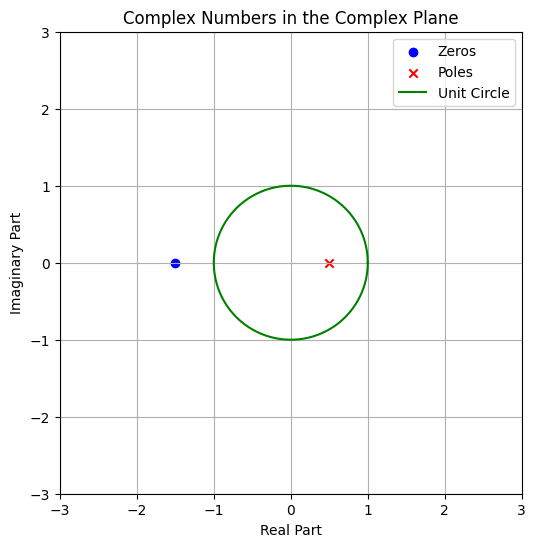

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def expand(arr, n):
    return np.pad(arr, (0, n - len(arr)), 'constant')

def pzmap(bz, az):
    m = len(bz)
    n = len(az)
    level = max(m, n)
    pad_bz = expand(bz, level)
    pad_az = expand(az, level)
    return [np.roots(pad_bz), np.roots(pad_az)]

class HFunc:
    def __init__(self, bz, az):
        self.bz: np.array = bz
        self.az: np.array = az

def plot_complex_numbers(bz, az):
    # Create a new figure with custom size
    fig = plt.figure(figsize=(6, 6))
    
    # Extract real and imaginary parts for both lists
    real_parts1 = [z.real for z in bz]
    imaginary_parts1 = [z.imag for z in bz]
    real_parts2 = [z.real for z in az]
    imaginary_parts2 = [z.imag for z in az]
    
    # Create scatter plots for both lists
    plt.scatter(real_parts1, imaginary_parts1, marker='o', color='blue', label='Zeros')
    plt.scatter(real_parts2, imaginary_parts2, marker='x', color='red', label='Poles')
    
    # Draw the unit circle
    theta = np.linspace(0, 2 * np.pi, 100)
    x_circle = np.cos(theta)
    y_circle = np.sin(theta)
    plt.plot(x_circle, y_circle, color='green', label='Unit Circle')
    
    # Set axis limits
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    
    # Force the x and y axis to be the same scale (each 1x1 grid should look like a square)
    plt.gca().set_aspect('equal', adjustable='box')
    
    # Add labels and title
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title('Complex Numbers in the Complex Plane')
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.grid(True)
    plt.show()

# Example usage
bz = [2, 3]
az = [1, -0.5]
plot_complex_numbers(*pzmap(bz, az))


/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_53416/2560454411.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


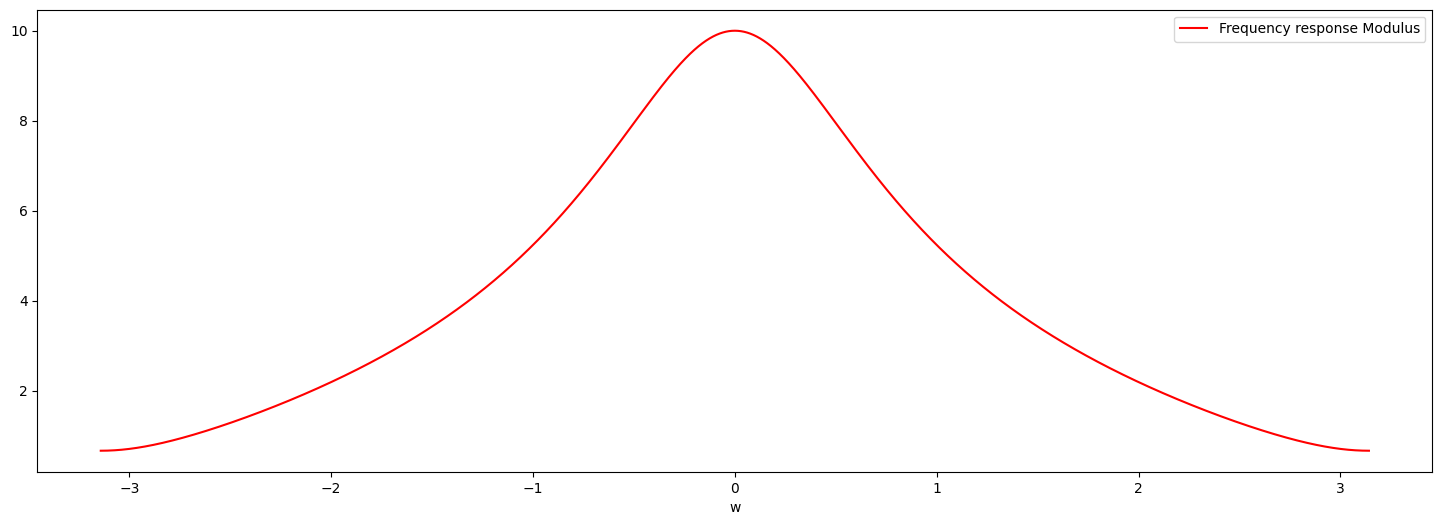

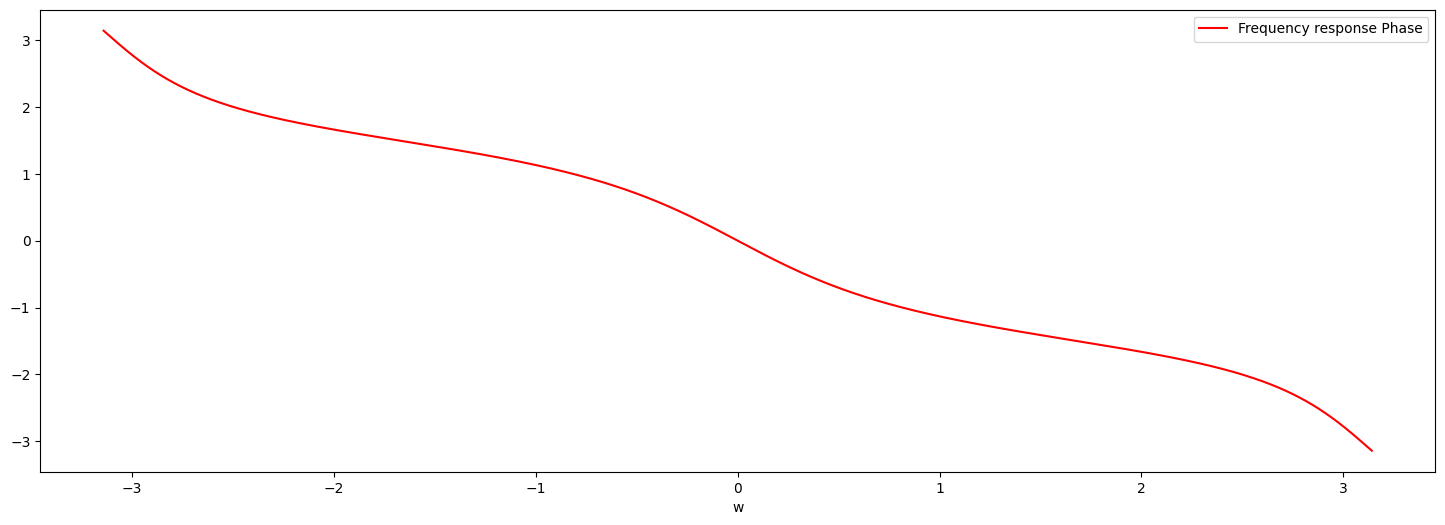

In [34]:
def h_value(bz, az, z: complex):
    num = sum([bz[i] * z ** (-i) for i in range(len(bz))])
    den = sum([az[i] * z ** (-i) for i in range(len(az))])
    return num / den
def freqz(bz, az, w):
    ... # w between -pi and pi?
    hs = np.array([h_value(bz, az, np.exp(1j * omega)) for omega in w])
    return w, hs

SAMPLE_N = 5000

def get_mod_pha_real_imag(c):
    return np.abs(c), np.angle(c), c.real, c.imag

ws = np.linspace(-np.pi, np.pi, SAMPLE_N)
ws, hs = freqz(bz, az, ws)

hs_plots = get_mod_pha_real_imag(hs)
names = ['Modulus', 'Phase', 'Real', 'Imaginary']

for i in range(2):
    fig = plt.figure(figsize=(18, 6))
    plt.plot(ws, hs_plots[i], 'r-', label=f'Frequency response {names[i]}')
    plt.xlabel('w')
    plt.legend()
    fig.show()

2, 8, 16, 17, 8, 4, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_53416/123089955.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


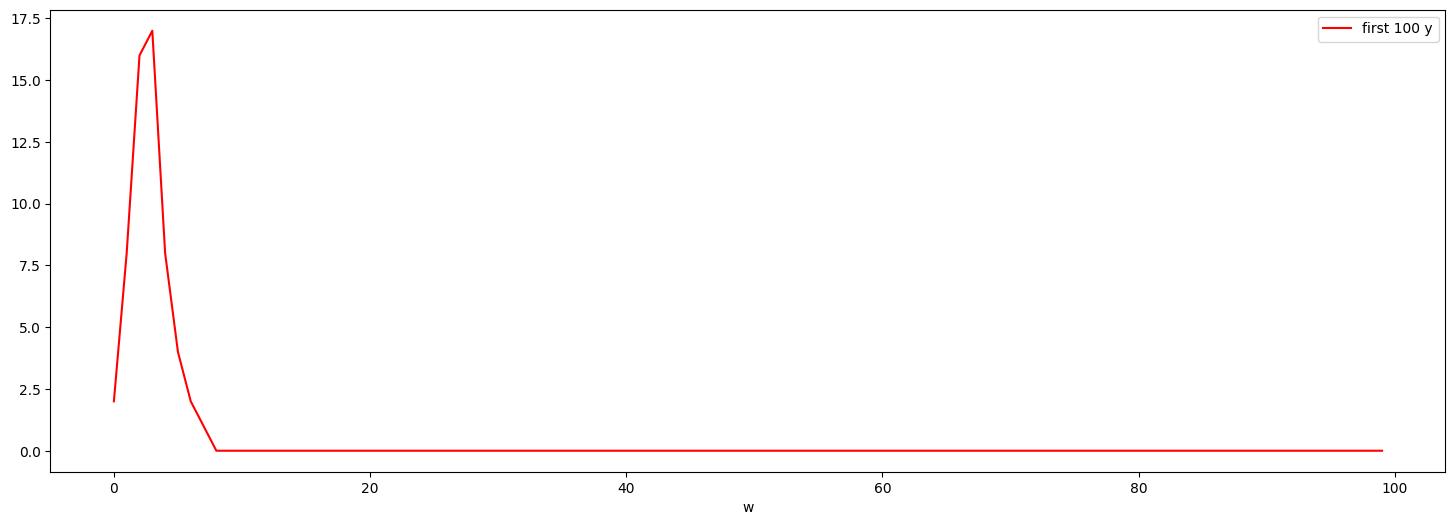

In [52]:
def filter(bz, az, x, L):
    ...
    # y[n] = 
    xs = expand(x, L) # first several x
    ys = np.zeros_like(xs)
    def y_at(n):
        return 0 if n < 0 else ys[n]
    def x_at(n):
        return 0 if n < 0 else xs[n]
    for n in range(L):
        # calculate y[n]
        ys[n] = sum([bz[i] * x_at(n - i) for i in range(len(bz))]) - sum([az[i] * y_at(n - i) for i in range(1, len(az))])
    return xs, ys


L = 100
xs = [1, 2, 3]
xs, ys = filter(bz, az, xs, L)
print(*ys[:20], sep=", ")
ys_plots = get_mod_pha_real_imag(ys)

fig = plt.figure(figsize=(18, 6))
plt.plot(np.arange(L), ys_plots[0], 'r-', label=f'first {L} y')
plt.xlabel('w')
plt.legend()
fig.show()

[2 4 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_53416/2905596999.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


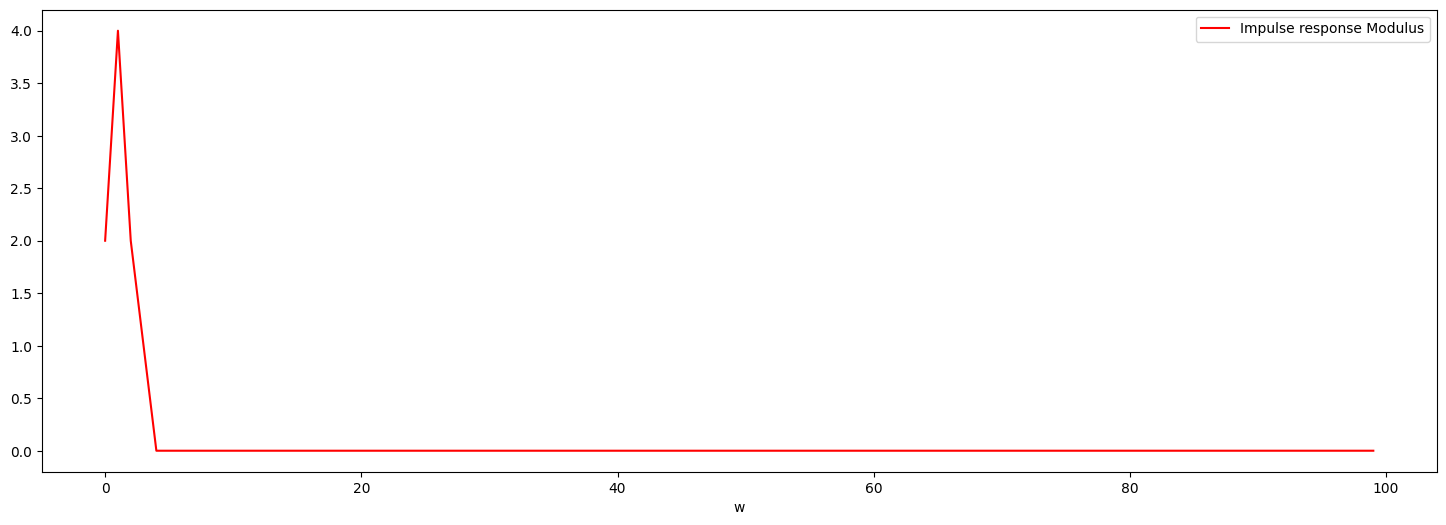

In [48]:
impulse_xs = [1] # impulse response
xs, ys = filter(bz, az, impulse_xs, L)
ys_plots = get_mod_pha_real_imag(ys)

print(ys[:20])

for i in range(1):
    fig = plt.figure(figsize=(18, 6))
    plt.plot(np.arange(L), ys_plots[i], 'r-', label=f'Impulse response {names[i]}')
    plt.xlabel('w')
    plt.legend()
    fig.show()